# Clasificadores Bayesianos (Naive Bayes) (Python)
---

<img src='../Imagenes/naiveBayes.png' style='width:20%;height:20%;float:left;margin-right:20px'>
Los *naive Bayes* asumen que la presencia de una variable particular en una clase **no** está relacionada con la presencia de ninguna otra variable.  

Clasifican a la nueva información basandonse en la probabilidad de pertenecer a cada una de ellas

In [3]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.2.Compras.csv')
datos.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [5]:
# 3. Crear variable y respuesta
X = datos.iloc[:,2:-1].values
y = datos['Compra'].values

In [6]:
# 4. Variables categóricas! --> Encode
'''
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
X[:,0] = enconder.fit_transform(X[:,0])
'''
dataframe = pd.DataFrame(X)
dataframe.head()

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
# 4. Separar en Entranamiento y Validación
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.25, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (300, 2)
La forma de y_train es:  (300,)
La forma de X_test es:  (100, 2)
La forma de y_test es:  (100,)


In [8]:
# 5. Escalar los datos
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[ 0.28571429,  0.53333333],
       [ 0.47619048,  0.25925926],
       [ 0.4047619 ,  0.44444444],
       [ 0.28571429,  0.47407407],
       [ 0.4047619 ,  0.25925926]])

In [9]:
# 6. Ajustar el Modelo
from sklearn.naive_bayes import GaussianNB as Bayesiano
clasificador = Bayesiano()
clasificador.fit(X_train, y_train)

GaussianNB(priors=None)

In [10]:
# 7. Hacer las predicciones
#y_fit = clasificador.predict(X_train)
y_pred = clasificador.predict(X_test)

In [11]:
# 8. Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

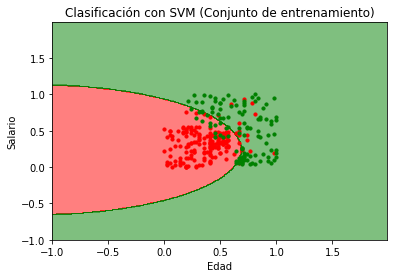

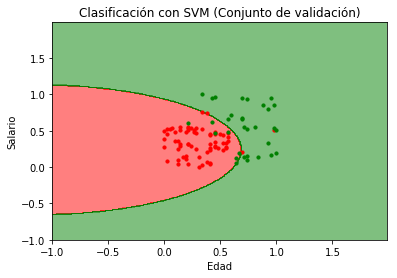

In [12]:
# 9. Visualizar los resultados
# 9.1 Conjunto de entramiento
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# 9.2 Conjunto de validación
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVM (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# Conclusión
---
...